### SRM coverage analysis for p, ph mapping for 'phased' and unphased regions

Notebook that combines the Coverage plots for DK0911 and Pst_104E for the DK0911 genome paper. This figure is meant to show the levels of heterzygosity based on short read mapping against the own assemblies. It aims to illustrate the level of homozygous collapsed, hemizygous and heterozygous regions.  
builds on DK0911_SRM_cov_DK0911_on_DK0911.ipynb and Pst_104E_SRM_cov_Pst_104E_on_Pst_104E.ipynb

Uses the het_cov.py scripts in the same folder as imported 'module'. <- Need to improve on modularization of the code.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import re
from Bio import SeqIO
from Bio import SeqUtils
import pysam
from Bio.SeqRecord import SeqRecord
from pybedtools import BedTool
import numpy as np
import pybedtools
import time
import matplotlib.pyplot as plt
import sys
import subprocess
import shutil
from Bio.Seq import Seq
import pysam
from Bio import SearchIO
import json
import glob
import scipy.stats as stats
import statsmodels as sms
import statsmodels.sandbox.stats.multicomp
import distance
import seaborn as sns
from pybedtools import BedTool
import matplotlib
from sklearn.externals.joblib import Parallel, delayed
import itertools as it
import tempfile
from scipy.signal import argrelextrema
import scipy
from het_cov import *
import het_cov
import importlib

/home/benjamin/anaconda3/lib/python3.5/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [3]:
importlib.reload(het_cov)
from het_cov import *

In [11]:
COMB_OUT = '/home/benjamin/genome_assembly/Warrior/DK0911_v04/comp_COV/old'
max_norm_cov =4
mapping_project = 'Self mapping'

In [20]:
##OUTPATH for figures
OUTPATH='/home/benjamin/genome_assembly/Warrior/DK0911_v04/figures'

### Program starts here ###

In [13]:
print(os.listdir(COMB_OUT))
DK0911_dict = {}
Pst_104E_dict = {}
bvf_header = ['index', 'norm_cov', 'mids', 'norm_freq']
for file in os.listdir(COMB_OUT):
    if file.startswith('PRI_NTKN_DK0911_on_DK_0911_v04'):
        key = file.split('.')[1]
        DK0911_dict[key] = pd.read_csv(os.path.join(COMB_OUT, file), header=None, sep='\t', names=bvf_header)
    if file.startswith('Pst79_folder5_on_Pst_104E_v13'):
        key = file.split('.')[1]
        Pst_104E_dict[key] = pd.read_csv(os.path.join(COMB_OUT, file), header=None, sep='\t', names=bvf_header)

['PRI_NTKN_DK0911_on_DK_0911_v04.p_pm.bvf.df', 'PRI_NTKN_DK0911_on_Pst_104E_v13.h_phm.bvf.df', 'PRI_NTKN_DK0911_on_DK_0911_v04.pwh_phm.bvf.df', 'Pst79_folder5_on_Pst_104E_v13.h_phm.bvf.df', 'PRI_NTKN_DK0911_on_DK_0911_v04.pwoh_phm.bvf.df', 'Pst79_folder5_on_DK_0911_v04.pwoh_phm.bvf.df', 'PRI_NTKN_DK0911_on_Pst_104E_v13.p_pm.bvf.df', 'PRI_NTKN_DK0911_on_Pst_104E_v13.p_phm.bvf.df', 'Pst79_folder5_on_DK_0911_v04.p_phm.bvf.df', 'Pst79_folder5_on_DK_0911_v04.pwh_phm.bvf.df', 'PRI_NTKN_DK0911_on_DK_0911_v04.h_phm.bvf.df', 'PRI_NTKN_DK0911_on_Pst_104E_v13.pwoh_phm.bvf.df', 'Pst79_folder5_on_Pst_104E_v13.p_phm.bvf.df', 'Pst79_folder5_on_Pst_104E_v13.p_pm.bvf.df', 'Pst79_folder5_on_Pst_104E_v13.pwh_phm.bvf.df', 'PRI_NTKN_DK0911_on_Pst_104E_v13.pwh_phm.bvf.df', 'Pst79_folder5_on_Pst_104E_v13.pwoh_phm.bvf.df', 'PRI_NTKN_DK0911_on_DK_0911_v04.p_phm.bvf.df', 'Pst79_folder5_on_DK_0911_v04.p_pm.bvf.df', 'Pst79_folder5_on_DK_0911_v04.h_phm.bvf.df']


In [14]:
DK0911_dict.keys()

dict_keys(['p_pm', 'h_phm', 'pwoh_phm', 'p_phm', 'pwh_phm'])

In [38]:
legend_text = '''
Legend:\n\n\n
ref == reference used for Illumina short read mapping
p == primary contigs
h == haplotigs

red decodes genome regions that are plotted \nfor coverage distributions
'''

In [16]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
matplotlib.rc('font', **font)

0 0
0 1
1 0
1 1
2 0
2 1


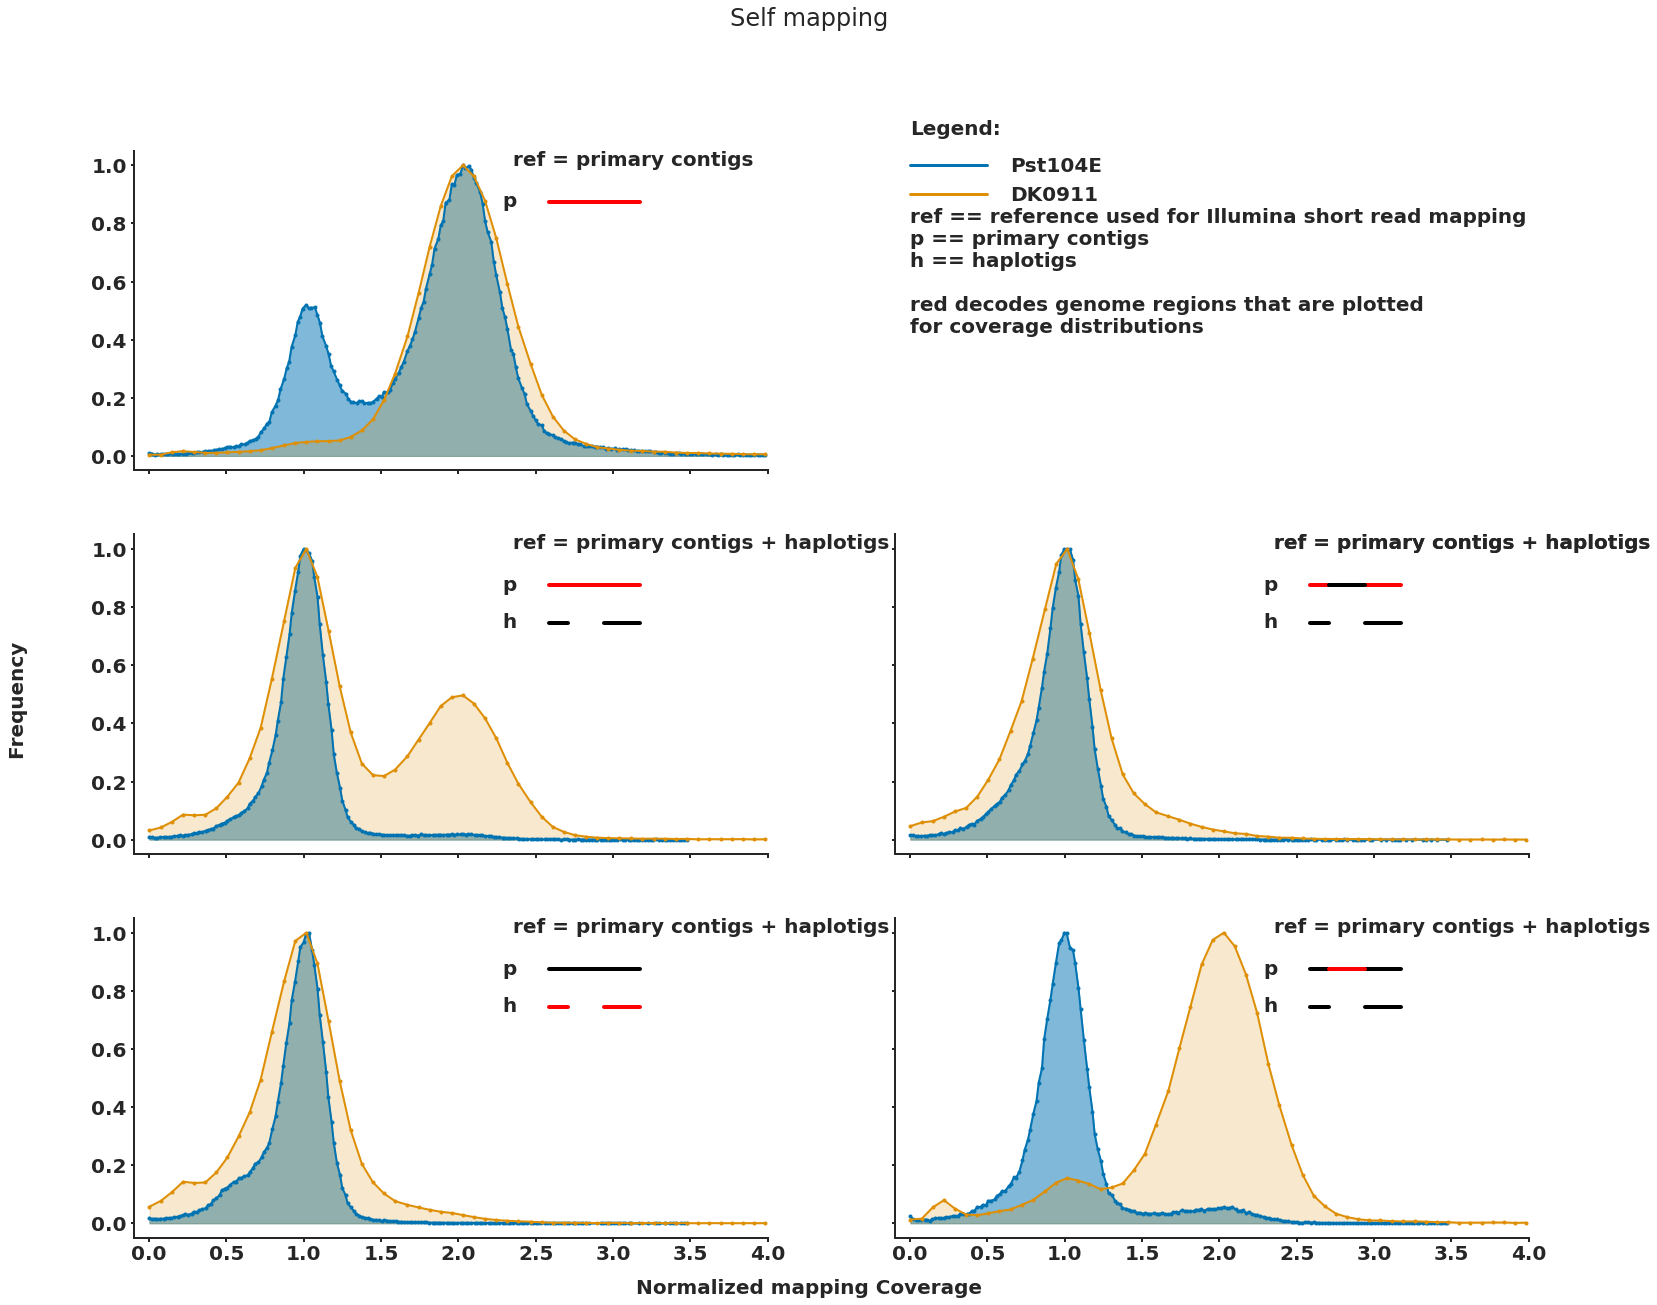

In [44]:
#now do the figure
fig, ax1 = plt.subplots(3, 2, figsize=(25,20), sharex='all', sharey='all')
#set style
sns.set_style("ticks")
sns.despine()
pallete = [sns.color_palette('colorblind')[x] for x in [0,1]]
#sns.set(style="white", palette="muted", color_codes=True)

fill_plot_axis(list(Pst_104E_dict['p_pm'].mids), list(Pst_104E_dict['p_pm'].norm_freq), color=pallete[0], ax=ax1[0,0])
fill_plot_axis(list(DK0911_dict['p_pm'].mids), list(DK0911_dict['p_pm'].norm_freq), color=pallete[1], ax=ax1[0,0], alpha=0.2)

fill_plot_axis(list(Pst_104E_dict['p_phm'].mids), list(Pst_104E_dict['p_phm'].norm_freq), color=pallete[0], ax=ax1[1,0])
fill_plot_axis(list(DK0911_dict['p_phm'].mids), list(DK0911_dict['p_phm'].norm_freq), color=pallete[1], ax=ax1[1,0], alpha=0.2)

fill_plot_axis(list(Pst_104E_dict['h_phm'].mids), list(Pst_104E_dict['h_phm'].norm_freq), color=pallete[0], ax=ax1[2,0])
fill_plot_axis(list(DK0911_dict['h_phm'].mids), list(DK0911_dict['h_phm'].norm_freq), color=pallete[1], ax=ax1[2,0], alpha=0.2)


fill_plot_axis(list(Pst_104E_dict['pwh_phm'].mids), list(Pst_104E_dict['pwh_phm'].norm_freq), color=pallete[0], ax=ax1[1,1])
fill_plot_axis(list(DK0911_dict['pwh_phm'].mids), list(DK0911_dict['pwh_phm'].norm_freq), color=pallete[1], ax=ax1[1,1], alpha=0.2)

fill_plot_axis(list(Pst_104E_dict['pwoh_phm'].mids), list(Pst_104E_dict['pwoh_phm'].norm_freq), color=pallete[0], ax=ax1[2,1])
fill_plot_axis(list(DK0911_dict['pwoh_phm'].mids), list(DK0911_dict['pwoh_phm'].norm_freq), color=pallete[1], ax=ax1[2,1], alpha=0.2)



y_upper_lim = ax1[0,0].get_ylim()[1]
xstart_text = max_norm_cov/1.7
plot_mapping_annotation_wtext(fig, ax1, pallete=['r']*5, y_upper_lim = y_upper_lim, xstart_text=xstart_text, legend_text= legend_text)

ax1[0,0].set_xlim([-0.1,4])

out_fn = os.path.join(OUTPATH, 'F2_%s_SRM_coverage.tiff' % mapping_project)

plt.suptitle(mapping_project)

ax1[0,1].plot([0,0.5], [1, 1], lw =3, color = pallete[0])
ax1[0,1].text(0.65, 0.98, 'Pst104E')

ax1[0,1].plot([0,0.5], [0.90, 0.90], lw =3, color = pallete[1])
ax1[0,1].text(0.65, 0.88, 'DK0911')


for x in range(0,3):
    for y in range(0,2):
        print(x,y)
        for axis in ['bottom','left']:
            ax1[x,y].spines[axis].set_linewidth(2)
        for axis in ['top','right']:
            ax1[x,y].spines[axis].set_linewidth(0)
        ax1[x,y].tick_params(width=2)

fig.savefig(out_fn, dpi=600,bbox_inches='tight')